# Regresión lógística binomial

[Curso de Regresión Logística con Python y scikit-learn](https://platiz.com/reglog)

Con el Binomial tenemos que resolver para dos elementos, mientras para los multinomiales clasficai varios elementos.

Pensemos como siempre en el proceso de pre-processing:
- Eliminar duplicados.
- Evaluar valores nulos.
- Remover columnas innecesarias.
- Procesar datos categoricos.
- Remover outliers.
- Escalar la data.

Utilizaremos la siguiente base de datos https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## Carga de datos

In [1]:
import pandas as pd 
import numpy as np

In [2]:
# Recuerda descargar el archivo y cambiar al enlance de directorio donde lo tienes guardado
df_data = pd.read_csv('Datasets\WA_Fn-UseC_-Telco-Customer-Churn.csv')

<>:2: SyntaxWarning: invalid escape sequence '\W'
<>:2: SyntaxWarning: invalid escape sequence '\W'
C:\Users\AlexisBenitez\AppData\Local\Temp\ipykernel_17456\753887089.py:2: SyntaxWarning: invalid escape sequence '\W'
  df_data = pd.read_csv('Datasets\WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [3]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Cambiar total_charges a numeric

Debido a que encontramos un problema con el "type" de dato que tenemos en los datos 

In [5]:
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='coerce')
# Para el manejo de los errores usamos " coerce " pues se supone que se toma automatico

## Manejo de datos nulos

In [6]:
df_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# Al econtrar datos nulos, remplazando por valores o quitandolos de nuestro data frame
df_data.dropna(inplace=True)

## Eliminar id

In [8]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Borramos datos o columnas que no aportan al modelo o no necesitamos
df_data.drop('customerID',axis=1,inplace=True)

Recordemos que el modelo se lleva mejor siempre que sean numeros los que apliquemos.

## Convertir a numérico variable objetivo

In [10]:
df_data['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [11]:
df_data['Churn'].replace(to_replace='Yes', value = 1, inplace=True)
df_data['Churn'].replace(to_replace='No', value = 0, inplace=True)

C:\Users\AlexisBenitez\AppData\Local\Temp\ipykernel_17456\639740546.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data['Churn'].replace(to_replace='No', value = 0, inplace=True)


In [12]:
df_data_processing = df_data.copy()

## Manejo de variables categóricas

In [13]:
df_data_processing = pd.get_dummies(df_data_processing)
df_data_processing.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


## Analisis de correlación

In [14]:
import matplotlib.pyplot as plt

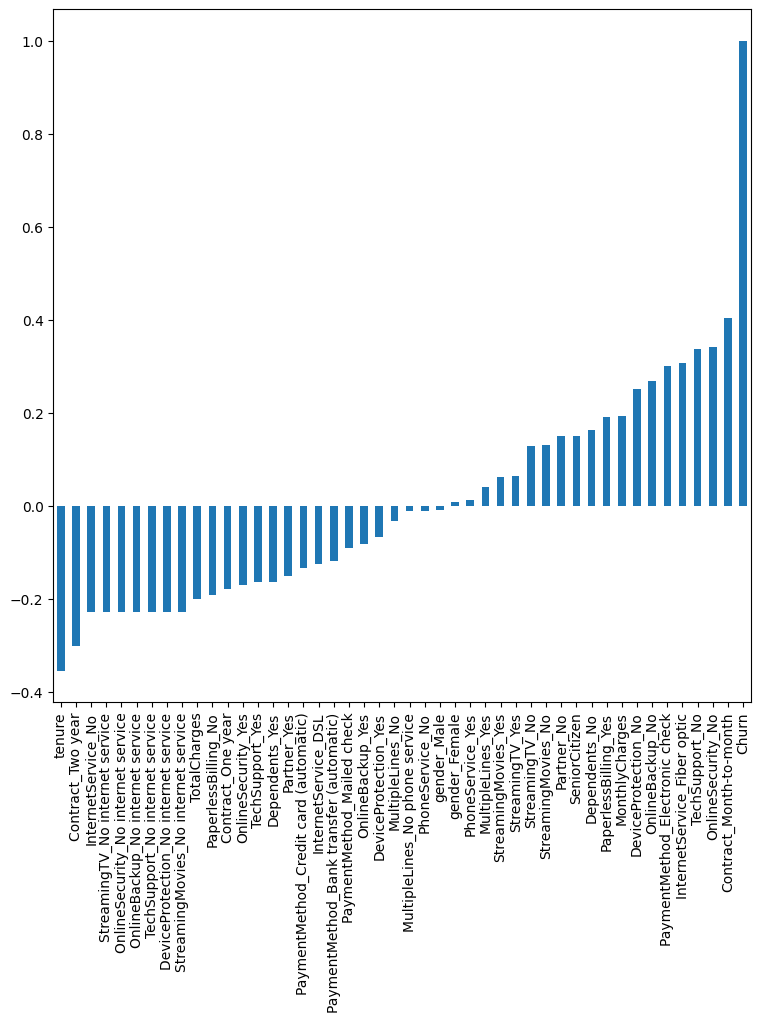

In [15]:
fig = plt.figure(figsize=(9,9))
df_data_processing.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

## Escalabilidad de los datos

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
df_data_processing_scaled =  scaler.fit_transform(df_data_processing)

In [18]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

In [19]:
df_data_processing_scaled

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.323944,0.662189,0.227521,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,0.0,1.000000,0.845274,0.847461,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,0.0,0.140845,0.112935,0.037809,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,1.0,0.042254,0.558706,0.033210,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [20]:
df_data_processing_scaled.columns = df_data_processing.columns

In [21]:
df_data_processing_scaled.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Análisis exploratorio de datos

In [22]:
import seaborn as sns

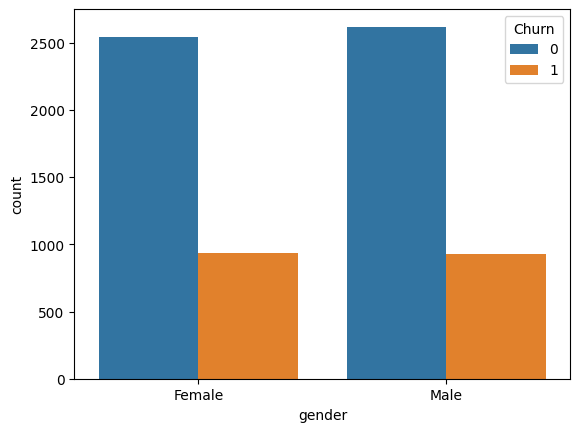

In [ ]:
sns.countplot(data=df_data, x='gender',hue='Churn')
plt.show()

# Lo anterior hay que hacerlo para todas las varaibles, entonces mejor busquemos como hacer una funcion

In [ ]:
# Aca la funcion para graficas las varaibles de una forma mas rapida
def plot_categorial(column):
    fig = plt.figure(figsize=(3,3))
    sns.countplot(data=df_data, x=column,hue='Churn')
    plt.show()

In [25]:
column_cat = df_data.select_dtypes(include='object').columns

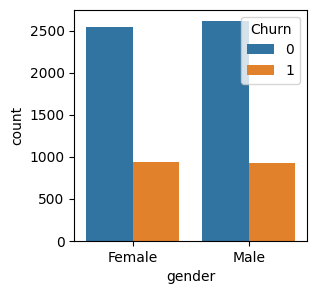

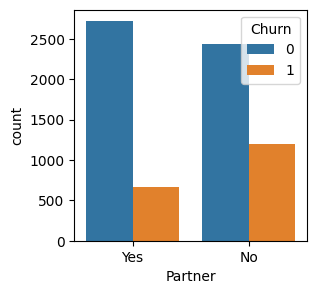

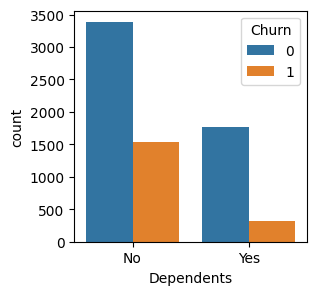

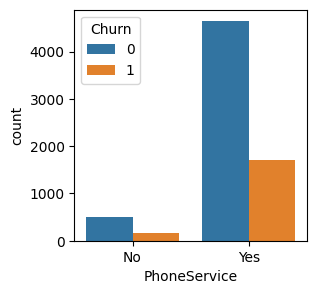

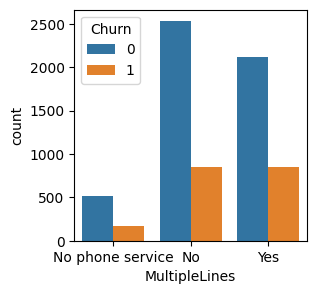

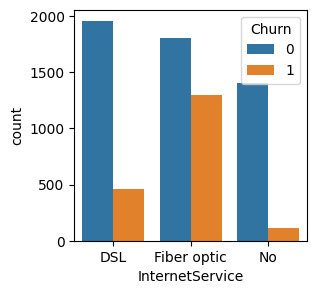

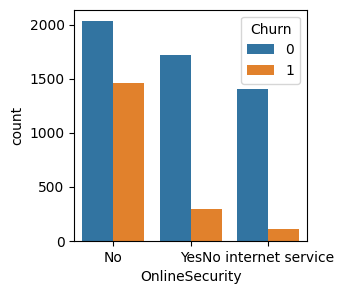

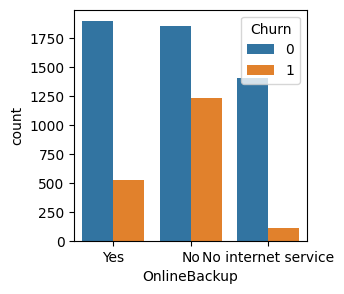

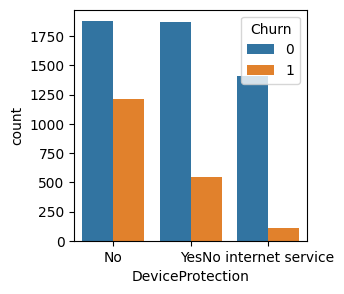

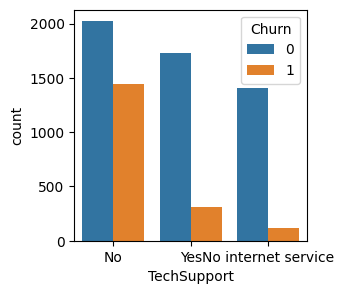

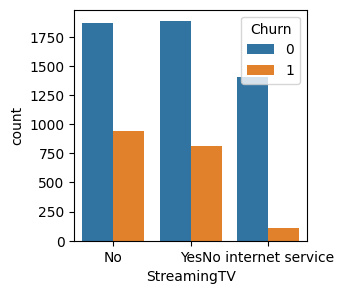

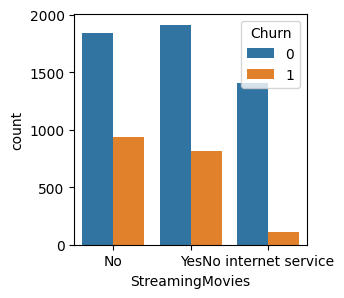

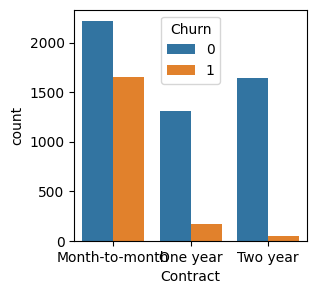

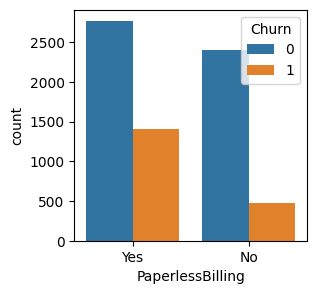

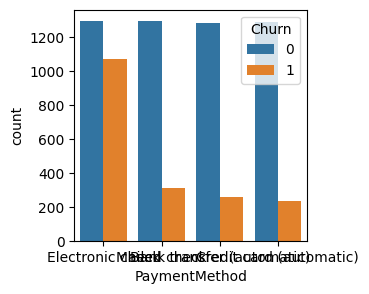

In [26]:
for _ in column_cat:
    plot_categorial(_)

<Figure size 500x500 with 0 Axes>

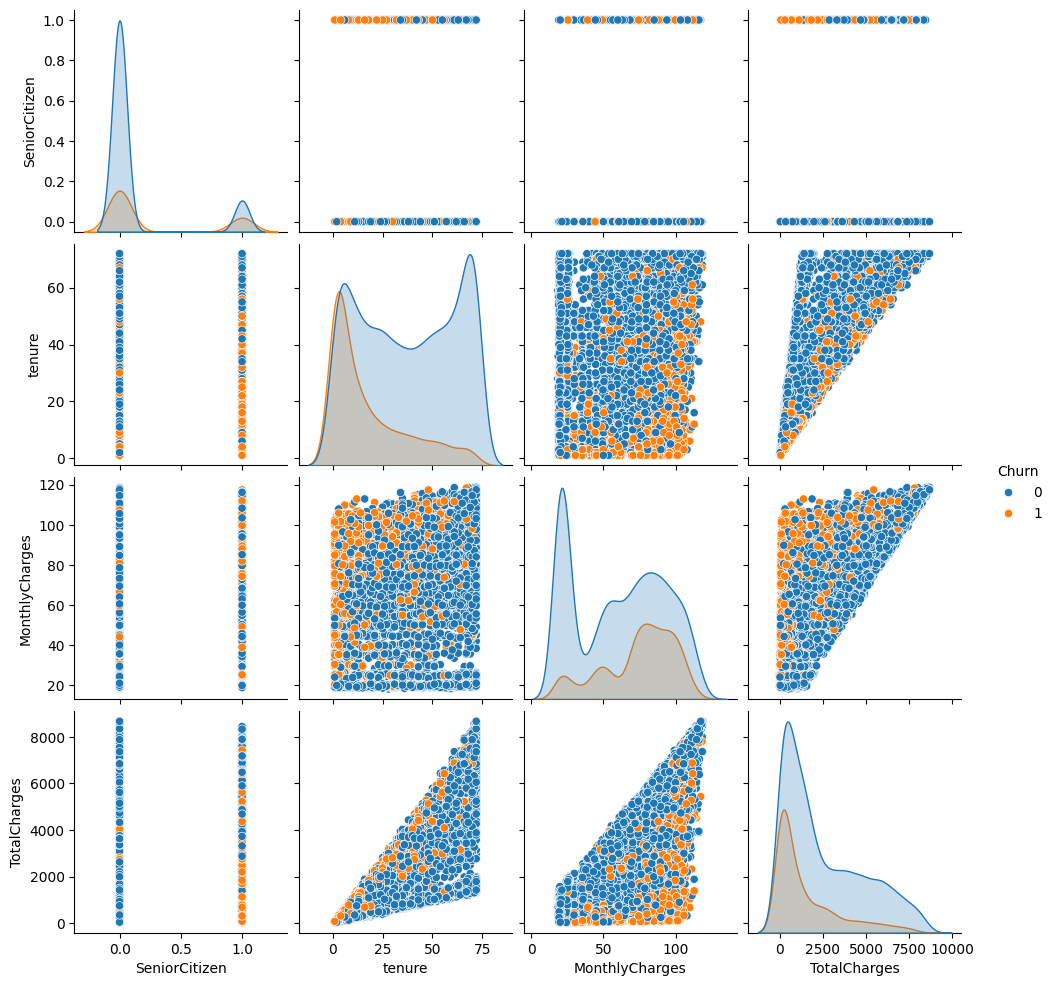

In [27]:
fig = plt.figure(figsize=(5,5))
sns.pairplot(data= df_data, hue='Churn')
plt.show()

## Entrenamiento del modelo de regresión logística binomial

In [28]:
X = df_data_processing_scaled.drop('Churn',axis=1)
y = df_data_processing_scaled['Churn'].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [39]:
X_train.shape

(4922, 45)

In [41]:
X_test.shape

(2110, 45)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [31]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test ))

0.795260663507109


## Evaluación del modelo

Los data points hace una proyeccion para obtener la probabailidad  apotechamos lo anterior para usar el ------ >Maximun Likelihood stimator 

Hay otro algoritmo, " no queremos optimizar el error" queremos es disminuir el error, para disminuir la funcion de costo, es decir lo que le cuesta al algoritmo optimizar el modelo para una mejor prediccion. 

La funcion de costos es una funcion matematica, y si hacemos derivadas parciales sobre un afuncion matematica lo que hacemos es descender sobre esa funcion, y el algun punto llgaremos al menor punto hasta encontrar su punto mas bajo, para obtener sus puntos mas basico.

In [32]:
model.predict_proba(X_test)

array([[0.99026199, 0.00973801],
       [0.86142958, 0.13857042],
       [0.30082845, 0.69917155],
       ...,
       [0.99033443, 0.00966557],
       [0.70163287, 0.29836713],
       [0.82938519, 0.17061481]])

In [ ]:
model.coef_

# Los valores negativos son utiles para predecir cuando el modelo da "1" y los valores negativos utiles para el modelo dando "0"

array([[ 0.21579901, -3.10526247, -0.03615205,  1.19787945, -0.06068636,
        -0.08412597, -0.1339601 , -0.01085223,  0.05598249, -0.20079482,
         0.0412991 , -0.18611143, -0.19572581,  0.0412991 ,  0.00961438,
        -0.44754058,  0.45183569, -0.14910744,  0.19867747, -0.14910744,
        -0.19438235,  0.04183902, -0.14910744, -0.0375439 ,  0.01418609,
        -0.14910744, -0.00989098,  0.17932175, -0.14910744, -0.17502664,
        -0.12417623, -0.14910744,  0.12847134, -0.12628893, -0.14910744,
         0.13058405,  0.70330219, -0.13506516, -0.71304936, -0.17551223,
         0.03069989, -0.03237652, -0.19025467,  0.18520842, -0.10738956]])

In [34]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

Axes(0.125,0.11;0.775x0.77)


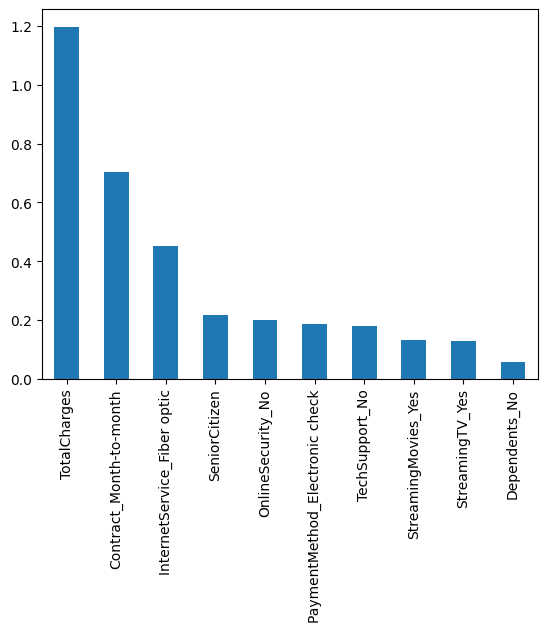

In [35]:
weights = pd.Series(model.coef_[0],
                    index=X.columns.values) 
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


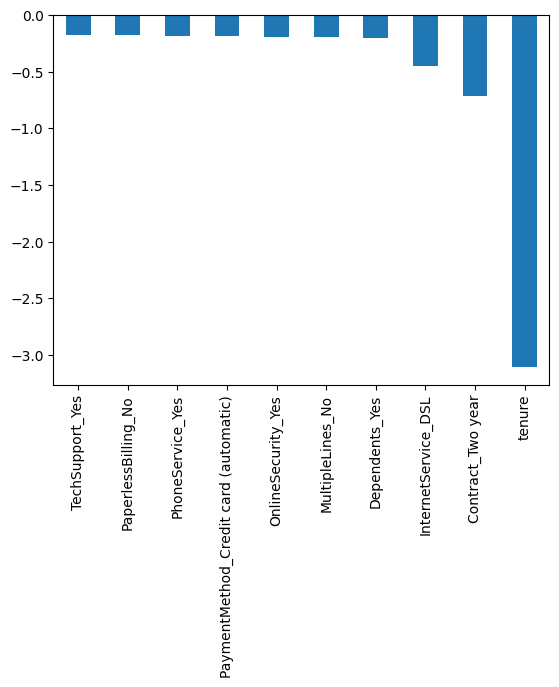

In [36]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 1100x1100 with 0 Axes>

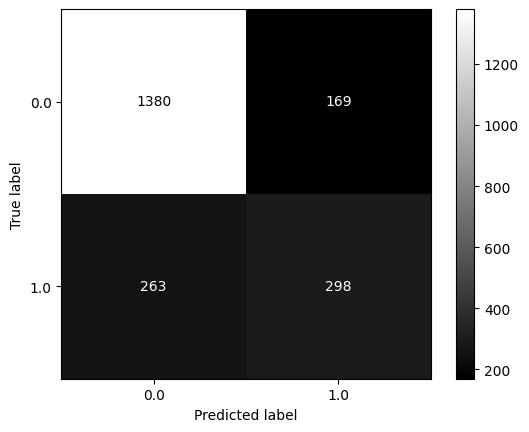

In [38]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()